# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow


## Get the data
Food101 dataset (101 different classes of food) from Kaggle

We use modifie version which consists of pizza and steak only

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-30 16:12:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  17.9MB/s    in 7.1s    

2024-08-30 16:13:02 (14.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

For a computer vision project, we usually visualize many samples of the data

In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [5]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [6]:
 # Get the classnames programmatically
 import pathlib
 import numpy as np
 data_dir = pathlib.Path("pizza_steak/train")
 class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
 print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


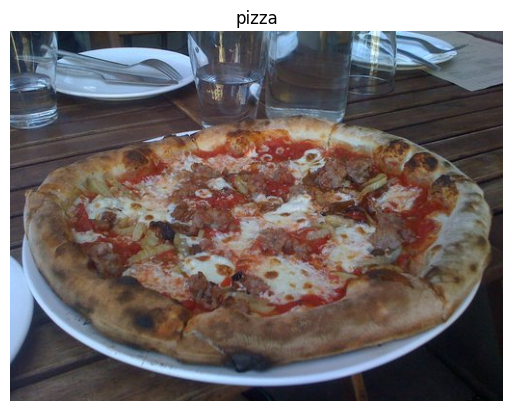

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")


In [9]:
import tensorflow as tf
tf.constant(img) # color channels (red, green, blue)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 91, 110, 106],
        [ 51,  70,  68],
        [ 41,  55,  56],
        ...,
        [ 87,  83,  97],
        [ 87,  83,  97],
        [ 85,  81,  95]],

       [[ 87, 103, 100],
        [ 84, 100,  97],
        [ 37,  51,  52],
        ...,
        [ 86,  84,  97],
        [ 86,  84,  97],
        [ 84,  82,  95]],

       [[ 76,  91,  86],
        [118, 133, 128],
        [ 39,  51,  51],
        ...,
        [ 87,  87,  99],
        [ 87,  87,  99],
        [ 85,  85,  97]],

       ...,

       [[ 64,  63,  71],
        [ 64,  63,  71],
        [ 65,  64,  72],
        ...,
        [  8,  12,  13],
        [  8,  12,  13],
        [  8,  12,  13]],

       [[ 67,  66,  74],
        [ 67,  66,  74],
        [ 67,  66,  74],
        ...,
        [  8,  12,  13],
        [  7,  11,  12],
        [  7,  11,  12]],

       [[ 65,  64,  72],
        [ 65,  64,  72],
        [ 67,  66,  74],
        ...,
        [  7,  11,  1

In [10]:
# View the image shape
img.shape # returns width, height, colour channels

(384, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
img/255 # 255 is the maximum pixel value

array([[[0.35686275, 0.43137255, 0.41568627],
        [0.2       , 0.2745098 , 0.26666667],
        [0.16078431, 0.21568627, 0.21960784],
        ...,
        [0.34117647, 0.3254902 , 0.38039216],
        [0.34117647, 0.3254902 , 0.38039216],
        [0.33333333, 0.31764706, 0.37254902]],

       [[0.34117647, 0.40392157, 0.39215686],
        [0.32941176, 0.39215686, 0.38039216],
        [0.14509804, 0.2       , 0.20392157],
        ...,
        [0.3372549 , 0.32941176, 0.38039216],
        [0.3372549 , 0.32941176, 0.38039216],
        [0.32941176, 0.32156863, 0.37254902]],

       [[0.29803922, 0.35686275, 0.3372549 ],
        [0.4627451 , 0.52156863, 0.50196078],
        [0.15294118, 0.2       , 0.2       ],
        ...,
        [0.34117647, 0.34117647, 0.38823529],
        [0.34117647, 0.34117647, 0.38823529],
        [0.33333333, 0.33333333, 0.38039216]],

       ...,

       [[0.25098039, 0.24705882, 0.27843137],
        [0.25098039, 0.24705882, 0.27843137],
        [0.25490196, 0

## An end-to-end example

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data
train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 224ms/step - accuracy: 0.6537 - loss: 0.6691 - val_accuracy: 0.7860 - val_loss: 0.4600
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7835 - loss: 0.4643 - val_accuracy: 0.8520 - val_loss: 0.3533
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8525 - loss: 0.3690 - val_accuracy: 0.8340 - val_loss: 0.3549
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8395 - loss: 0.3841 - val_accuracy: 0.7500 - val_loss: 0.4960
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8530 - loss: 0.3523 - val_accuracy: 0.8580 - val_loss: 0.3428


## Binary classification: Let's break it down!

1. Become one with the data
2. Preprocess the data (prepare it for our model, the main part is scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


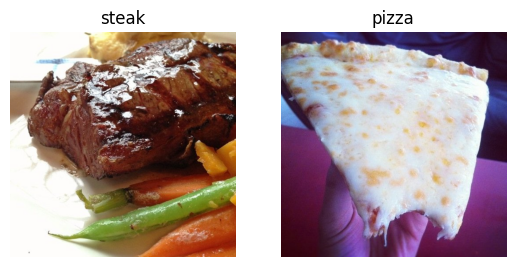

In [13]:
# Visulize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data

In [14]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

In [15]:
!nvidia-smi

Fri Aug 30 16:14:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0              44W /  70W |   1703MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
len(train_data)

47

In [19]:
1500/32

46.875

### 3. Create a CNN model (start with a baseline)

In [20]:
 # Make the creating of our model a little easier
 from tensorflow.keras.optimizers import Adam
 from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
 from tensorflow.keras import Sequential

In [21]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [22]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [23]:
len(train_data), len(test_data)

(47, 16)

In [24]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.6448 - loss: 2.6651 - val_accuracy: 0.6620 - val_loss: 0.6001
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7545 - loss: 0.5010 - val_accuracy: 0.8080 - val_loss: 0.4295
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8596 - loss: 0.3423 - val_accuracy: 0.7960 - val_loss: 0.4532
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9327 - loss: 0.2130 - val_accuracy: 0.7840 - val_loss: 0.5285
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9804 - loss: 0.0750 - val_accuracy: 0.7720 - val_loss: 0.6240


### 5. Evaluating our model

Let's plot the loss curve

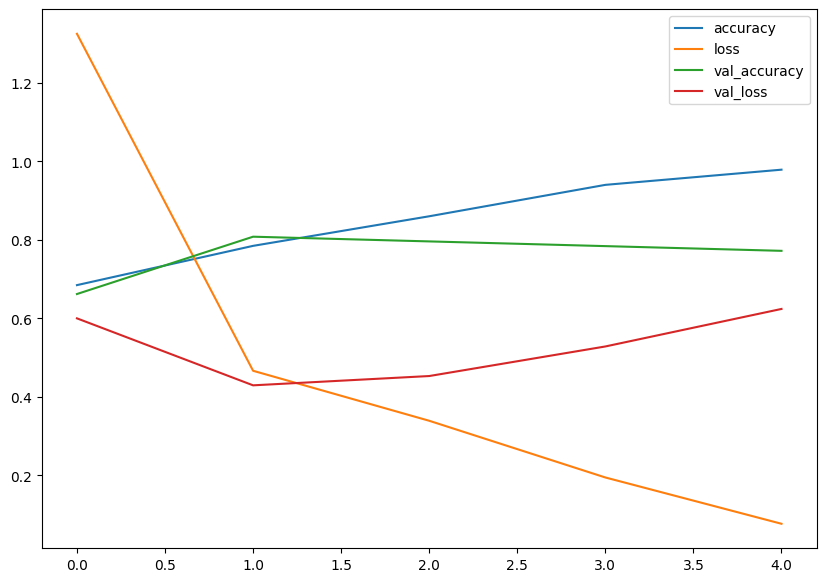

In [25]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [26]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

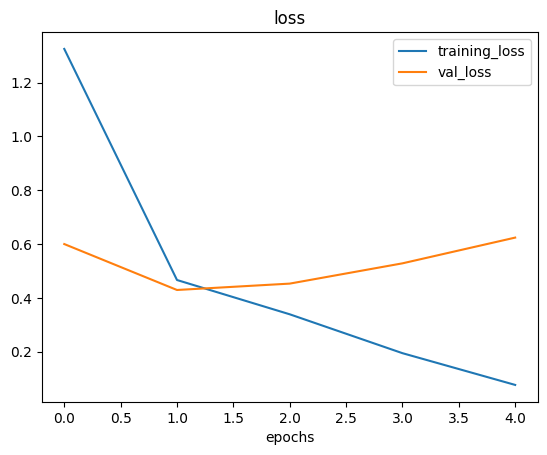

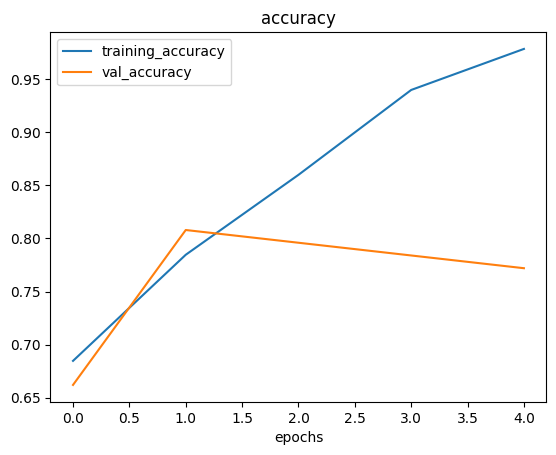

In [27]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the hyperparameters

In [28]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [29]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [30]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.6210 - loss: 0.6406 - val_accuracy: 0.7780 - val_loss: 0.4622
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8041 - loss: 0.4452 - val_accuracy: 0.8460 - val_loss: 0.3782
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8202 - loss: 0.4092 - val_accuracy: 0.8780 - val_loss: 0.3376
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.8380 - loss: 0.3804 - val_accuracy: 0.8860 - val_loss: 0.3214
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8075 - loss: 0.4195 - val_accuracy: 0.8640 - val_loss: 0.3177


In [31]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

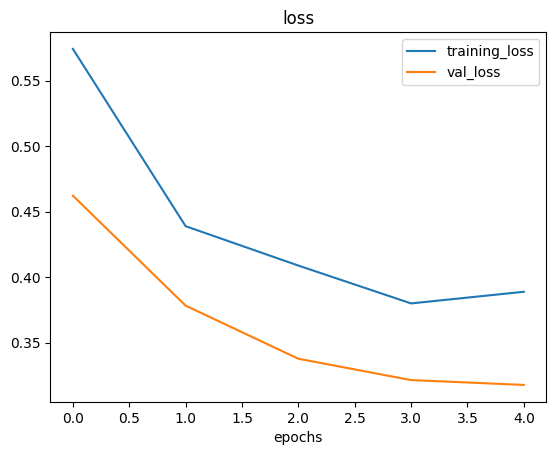

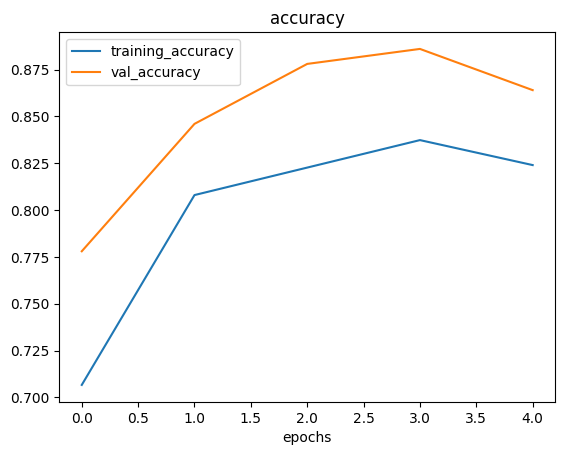

In [32]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [33]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [34]:
# Create augmented training data batches
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   shuffle=False) # For visualization purposes

# Create non-augmented training data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         class_mode="binary",
                                                         shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [35]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

showing image number: 25


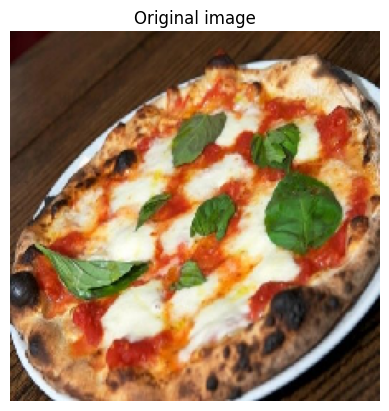

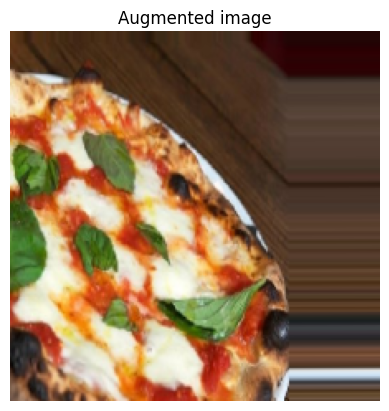

In [36]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

In [37]:
# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - accuracy: 0.3867 - loss: 0.7211 - val_accuracy: 0.5020 - val_loss: 0.6810
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 755ms/step - accuracy: 0.4483 - loss: 0.6999 - val_accuracy: 0.6340 - val_loss: 0.6864
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 608ms/step - accuracy: 0.5852 - loss: 0.6816 - val_accuracy: 0.5000 - val_loss: 0.7551
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 567ms/step - accuracy: 0.4951 - loss: 0.7300 - val_accuracy: 0.7640 - val_loss: 0.6749
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 388ms/step - accuracy: 0.6640 - loss: 0.6760 - val_accuracy: 0.7760 - val_loss: 0.6040


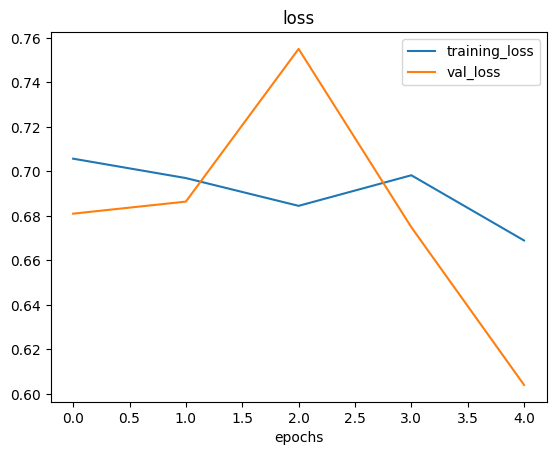

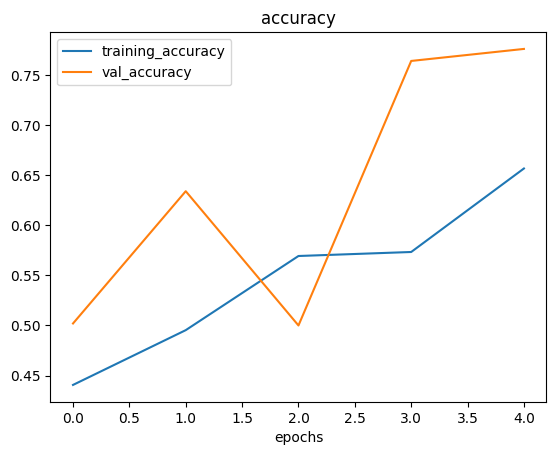

In [38]:
# Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model on it and see what happens

In [39]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [40]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 417ms/step - accuracy: 0.6018 - loss: 0.6571 - val_accuracy: 0.6740 - val_loss: 0.5843
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 356ms/step - accuracy: 0.6951 - loss: 0.5747 - val_accuracy: 0.8380 - val_loss: 0.3902
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 362ms/step - accuracy: 0.7793 - loss: 0.4755 - val_accuracy: 0.8580 - val_loss: 0.3379
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 393ms/step - accuracy: 0.7511 - loss: 0.5051 - val_accuracy: 0.8520 - val_loss: 0.3616
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 412ms/step - accuracy: 0.7790 - loss: 0.4690 - val_accuracy: 0.8780 - val_loss: 0.3183


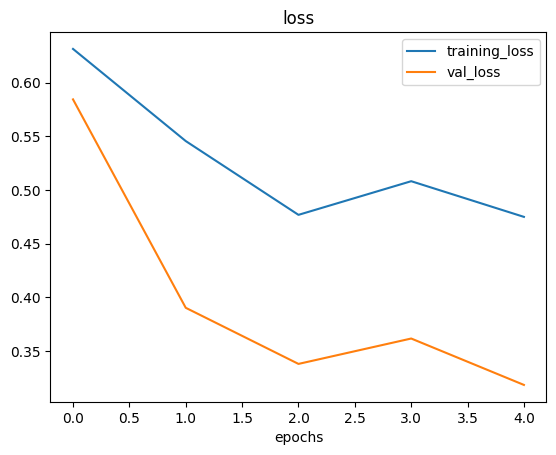

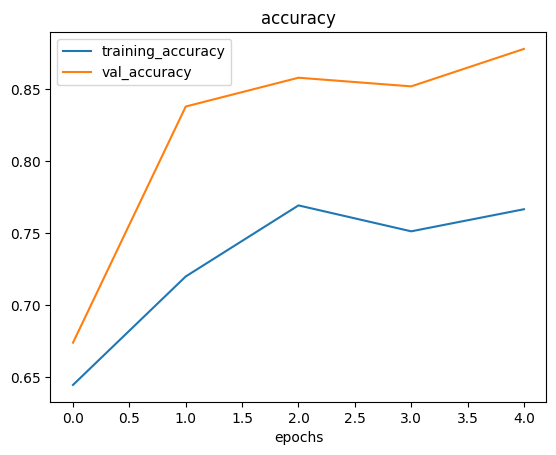

In [41]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat untill satisfied

There are few things that we could try to improve our model accuracy:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (Give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [42]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


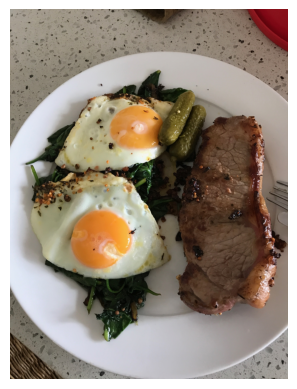

In [43]:
# View our example image
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [44]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [45]:
# Create a function to import image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it
  to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [46]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [47]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


array([[0.84317684]], dtype=float32)

In [48]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [49]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediciton with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


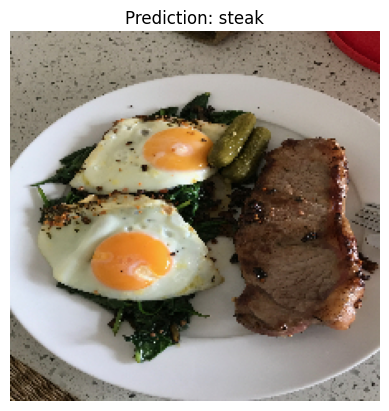

In [50]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


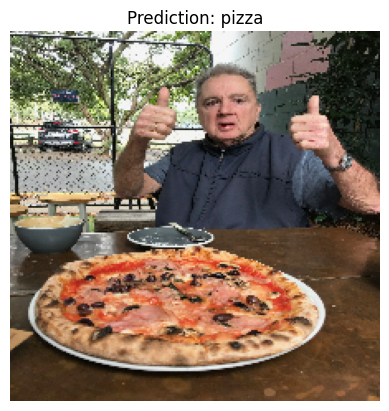

In [51]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

10 classes of food.

## 1. Import and become one with the data

In [52]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-08-30 16:21:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  15.8MB/s    in 35s     

2024-08-30 16:21:58 (14.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [53]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [54]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [55]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


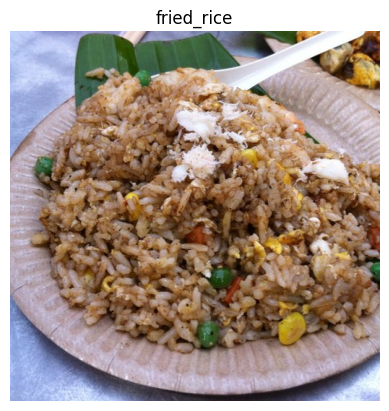

In [56]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (Start with a baseline)

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model to the data
history_8 = model_8.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 164ms/step - accuracy: 0.1155 - loss: 2.2881 - val_accuracy: 0.2160 - val_loss: 2.1526
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - accuracy: 0.3164 - loss: 1.9705 - val_accuracy: 0.3172 - val_loss: 1.9672
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 251ms/step - accuracy: 0.5286 - loss: 1.4269 - val_accuracy: 0.3044 - val_loss: 2.1781
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 135ms/step - accuracy: 0.7539 - loss: 0.7704 - val_accuracy: 0.2748 - val_loss: 2.6167
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.9046 - loss: 0.3252 - val_accuracy: 0.2736 - val_loss: 3.7127


### 5. Evaluate the model

In [59]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.2863 - loss: 3.5963


[3.712679624557495, 0.2736000120639801]

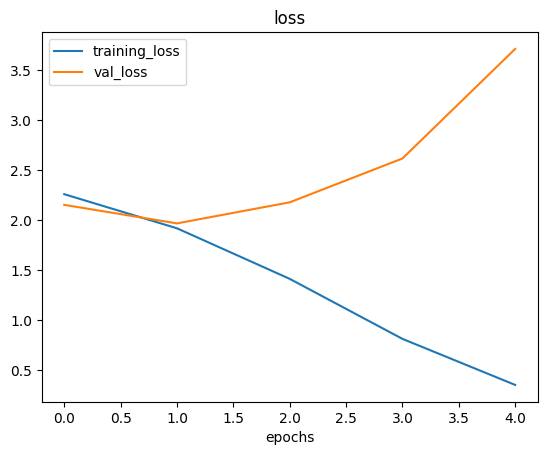

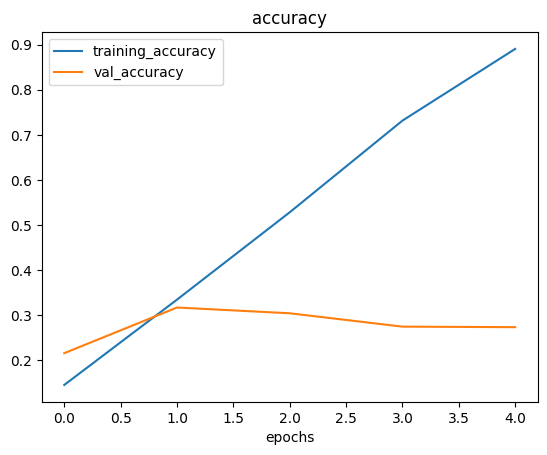

In [60]:
# Check out the model's loss curves
plot_loss_curves(history_8)

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

### Trying to reduce overfitting with data augmentation

In [61]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [64]:
# Let's create another model but this time we'll fit it on the augmented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 508ms/step - accuracy: 0.1299 - loss: 2.3087 - val_accuracy: 0.1996 - val_loss: 2.1737
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 432ms/step - accuracy: 0.1985 - loss: 2.1932 - val_accuracy: 0.2848 - val_loss: 2.0173
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 435ms/step - accuracy: 0.2418 - loss: 2.1043 - val_accuracy: 0.3464 - val_loss: 1.8858
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 109s 455ms/step - accuracy: 0.2813 - loss: 2.0438 - val_accuracy: 0.3324 - val_loss: 1.8993
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 418ms/step - accuracy: 0.3152 - loss: 1.9690 - val_accuracy: 0.3836 - val_loss: 1.8146


In [66]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.2712 - loss: 3.6879


[3.712679624557495, 0.2736000120639801]

In [67]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.3870 - loss: 1.7970


[1.8145965337753296, 0.38359999656677246]

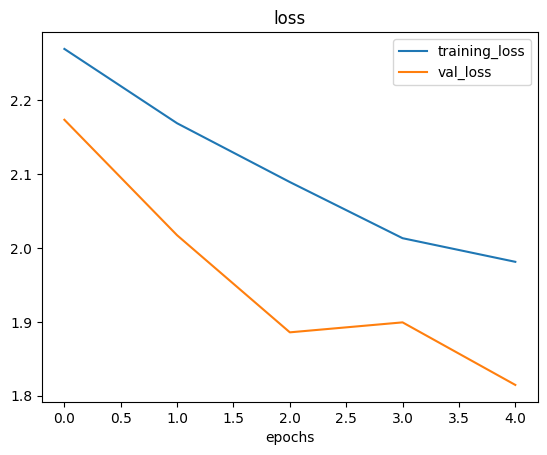

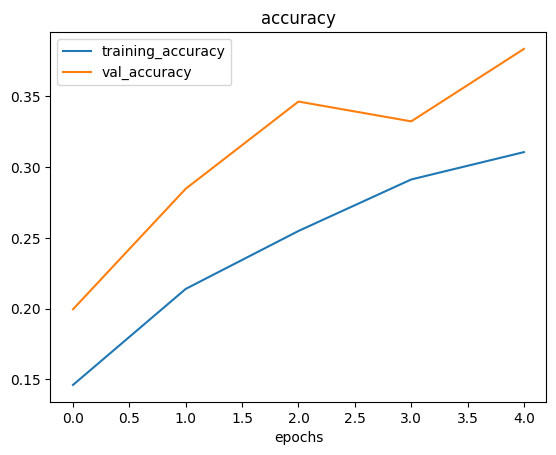

In [68]:
# Check out our model loss curve
plot_loss_curves(history_10)

### Making a prediction with our trained model

In [65]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [72]:
# Reconfig the function to work with multiclass
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediciton with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


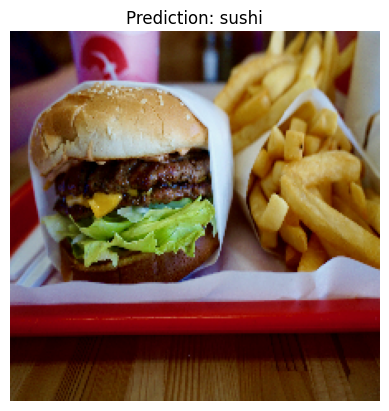

In [76]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

## Saving and loading our model



In [78]:
# Save a model
model_10.save("saved_trained_model_10.h5")



In [80]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.h5")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.3880 - loss: 1.8096


[1.8145962953567505, 0.38359999656677246]

In [81]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.3914 - loss: 1.7974


[1.8145962953567505, 0.38359999656677246]